# Regression

**Goal**: teach computer to predict a numerical value given some input

**Model**. Consider approach based on regression analyis.
[Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis) is a statistical technique to estimate dependence between variables. 
Suppose we have samples $x_n$ of a random value $X$ and the corresponding samples $y_n$ of a random value $Y$.
We assume $Y$ is a function $f$ of $X$ plus an error term independent of $X$:

$$
Y=f(X;\theta)+W.
$$

The function $f$ defines possible relationship between the variables and the parameters $\theta$ controls exact form of the dependence.


**Example 1.** Implement in Python function to sample the function $y=\sin x$ with addition of normally distributed noise. 

In [30]:
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt

In [31]:
def mae(params, x, y, D=5):
    f = F(x, D)
    y_pred = f@params
    return np.mean(np.abs(y-y_pred))

def mse(params, x, y, D=5):
    f = F(x, D)
    y_pred = f@params
    return np.mean((y - y_pred)**2)

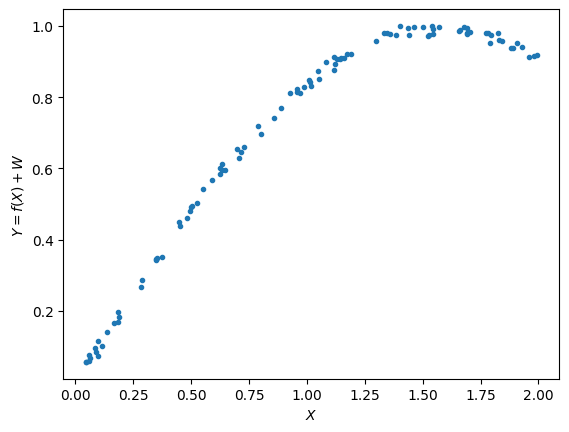

In [32]:
S = 100 # sample size
X = np.random.rand(S)*2 # inicialise X array
# print(f'min X = {np.min(X)}, max X = {np.max(X)}') 

W = np.random.randn(S)*0.01 # initialize noise
Y = np.sin(X) + W # create Y samples as sin function with noise
plt.plot(X,Y, '.') # ploting samples
plt.xlabel('$X$')
plt.ylabel('$Y=f(X)+W$')
plt.show()

**Approaches**. In fact as far as we need to find best function that approximate input, we will solve an optimization problem. Thus we need to define something to optimize. Mainly two functions are used: **loss** and **likelihood** functions.

**Minimum loss function principle**.
Function $f$ is a solution controlled by the parameter $\theta$. The optimal $\theta$ provides the best fitting function. To find optimal value we need to solve optimization problem or find minimum of some error function. Define **Loss function**:

$$
R[x,y] = ||y - f(x,\theta)||^2
$$

The solution of optimisation problem is $\theta_{opt} = \mathrm{argmin}_\theta(L)$

In practice, the estimate of $\theta$ is obtained by the [least squares method](https://en.wikipedia.org/wiki/Least_squares)
from minimization of the mean square error:

$$
R[\theta] = \sum_n (y_n-f(x_n,\theta))^2.
$$

The minimum of $R$ can be found from the necessary condition of optimality, which is sufficient in the case of quadratic functional:

$$
\frac{\partial R}{\partial\theta_k} = 2\sum_n(y_n-f(x_n,\theta_k))\frac{\partial f}{\partial \theta_k}(x_n,\theta) = 0\forall k.
$$

**Example 2.** Implement a function that solve linear least squares method for decomposition of $y$ over polynomials of degree $D$
on the interval $[0,1]$
using Moore-Penrose inverse:

$$
f(x,\theta)=\sum_{k=0}^D \theta_k x^k.
$$ 


In [33]:
def f(x, theta):
  xn = np.power(x, np.arange(len(theta)))
  return np.dot(xn, theta)

# theta =        1, x, x^2,   x^3, x^4,       x^5
theta_optimal = np.array([0, 1,   0,-1/2/3,   0, 1/2/3/4/5])

x0 = 0.1 
print(x0, f(x0,theta_optimal), np.sin(x0))

0.1 0.09983341666666667 0.09983341664682815


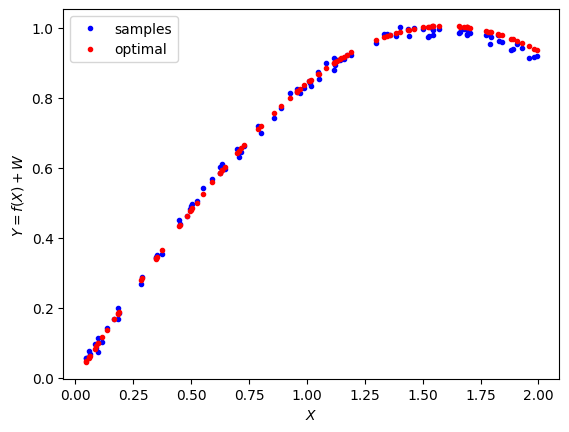

In [34]:
def F(x, D): # basis
  """
  Arguments:
    D - number of parameters.
  """
  return np.power(x[:,None], np.arange(D)[None,:])

def f(x, theta):
  # axis 0 = # sample
  # axis 1 = monomial degree
  xn = F(x, D=len(theta))
  return np.dot(xn, theta)

y_optimal = f(X, theta_optimal)

plt.plot(X,Y, '.b', label='samples')
plt.plot(X,y_optimal, '.r', label='optimal')
plt.xlabel('$X$')
plt.ylabel('$Y=f(X)+W$')
plt.legend()
plt.show()

**Example 3**. Calculate mean square error for obtained solution.

In [35]:
def R(theta, x, y):
  rn = (y - f(x, theta))**2
  return np.sum(rn)

print('Mean square error', R(theta=theta_optimal, x=X, y=Y)/np.sqrt(S) )

Mean square error 0.001885190889269825


**Maximum likelihood principle**. Another way to approach machine learning problem is a search of maximum of some likelihood function. Likelihood function function is a probability of specific outcome. 
Given probability density $f_W$ for random noise $W$, we can estimate likelihood of outcomes resulting in samples $(x_n,y_n)$.
[Likelihood function](https://en.wikipedia.org/wiki/Likelihood_function) for the continuous destribution can be written as follows:
$$
L(\theta|x,y) = \prod_n f_W(y_n-f(x_n,\theta)). 
$$

$$
\log L(\theta|x,y) = \sum_n \log f_W(y_n-f(x_n,\theta)). 
$$

Maximum of the likelihood function corresponds to the value of $\theta$ such that outcomes $(x_n,y_n)$ are most probable,
thus we obtain the maximum likelihood estimate for the parameters 

$$
\hat\theta = \mathrm{argmax}_\theta \log L(\theta|x,y).
$$

**Problem 1.** Which distribution of $W$ does correspond to least squares method (minimum of mean square error coincides with maximum of likelihood function)?


**Задание 1.** Максимум правдоподобия достигается при минимуме среднеквадратической ошибки для классического нормального шума

**Training**.
From the point of view of machine learning (ML), the function $R$ is a loss function measuring performance of the artificial neural network (ANN) $f$ with parameters $\theta$. 
The network is used to predict the value of $Y$ given a value of $X$.  
In the context of ML the optimization of $\theta$ above is called training of the algorithm/network.

The simplest method to train an algorithm is the [steepest gradient method](https://en.wikipedia.org/wiki/Gradient_descent).
Given an initial vector of parameters $\theta$, the parameters are updated on each step of optimization by the formula:

$$
\theta\mapsto \theta-\alpha\frac{\partial R}{\partial\theta}[\theta],
$$
until the method converges, i.e. the stop conditions are satisfied, e.g. the loss $R$ is small enough,
or its update $\partial R/\partial \theta$ is small.
The parameter $\alpha$ is learning rate in ML or step size in the numerical methods, it is a metaparameter, i.e. it does not belong to the model, but may affect the result of optimization. 
In the simplest form of the gradient descend the learning rate is constant, however often sofisticated method of variation of $\alpha$ are required 
to stabilze the method or improve convergence, e.g. [Adam method](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam).
Higher order method, such as [LBFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm), can also be used to improve convergence, however the methods are used less often.

The number of samples sometimes much larger than required to estimate the direction of optimization reliably,
in the case the extra points only slow down the computation of the gradient.
Therefore [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) is commonly used in ML instead of the gradient method.
In the method only a subset (batch) of the samples is used to compute the gradient of loss,
the batch is regenerated/resampled after few iterations of optimization. 


The most well-known variant of the least square method is the linear one/linear regression.
In the case prediction function $f$ depends on $\theta$ linearly:

$$
f(x,\theta)=\sum_k f_k(x)\theta_k,
$$
where $f_k$ is a set of predefined functions forming a basis (for instance, in **Example 2** we used the basis of polynomials).
Then optimality conditions takes form of a linear system with respect to $\theta$:

$$
\frac{\partial R}{\partial\theta_k} = 2\sum_n\bigg(y_n-\sum_j f_j(x_n)\theta_j\bigg)f_k(x_n) = 0\forall k.
$$

$$
F^T y - F^T F \theta = 0,
$$
where $F$ is a matrix with elements $F_{nk}=f_k(x_n)$

$$
F^T F \theta=F^T y.
$$
The solution to the problem is given by the [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of the matrix $F$:

$$
\hat \theta=(F^T F)^{-1}(F^T y).
$$ 
Numerically the solution can be computed without computation the square of the matrix $F$ using e.g. [QR-decomposition](https://en.wikipedia.org/wiki/Numerical_methods_for_linear_least_squares).

Unfortunatelly, it is hard to solve least square problem explicitly for dependencies $f$ more complex than linear. 
Hopefully, ML methods can be applied to arbitrary sufficiently smooth functions $f$.

**Example 4**. Implement function to solve least square problem and compare obtained parameter value with optimal one.

In [36]:
def lsq(x, y, D):
  f = F(x, D)
  theta = np.linalg.solve( f.T@f, f.T@y )
  return theta

D = len(theta_optimal)
theta_lsq = lsq(X, Y, D)
print(f'opt: {theta_optimal}')
print(f'lsq: {theta_lsq}')


opt: [ 0.          1.          0.         -0.16666667  0.          0.00833333]
lsq: [ 0.00566872  0.95789612  0.13434653 -0.33899494  0.09047635 -0.00892964]


**Problem 2.** Split the data set $(x_n,y_n)$ to the training set (80%) and testing set (20%) and choose optimal $D$ avoiding overfitting.

In [37]:
def split_data(X, Y, rate = 0.8):
    data = np.vstack((X, Y))
    data = data.T
    np.random.shuffle(data)
    test_rate = (1 - rate) / 2
    train_data = data[:int(len(X) * rate)] 
    test_data = data[int(len(X)*rate):int(len(X)*(rate + test_rate))]
    validate_data = data[int(len(X)*rate + test_rate):]   
    return train_data, test_data, validate_data

In [38]:
train, test, validate = split_data(X, Y)

In [39]:
eps = 1e-8
error = np.inf
newErr = 10
D_opt = 1
err_D = []
while (error - newErr) > eps:
    error = newErr
    theta_lsq = lsq(train[:,0], train[:,1], D_opt)
    newErr = R(theta_lsq, validate[:,0], validate[:, 1])
    err_D.append(newErr)
    D_opt += 1
D_opt -= 1
print(theta_lsq)
print(D_opt)
print(err_D)

[-9.61133457e-04  1.03599061e+00 -8.90810796e-02 -8.56735040e-02
 -3.49653372e-02  1.37312353e-02]
6
[2.6788359953389937, 0.35390907696202706, 0.007272564097687753, 0.002939585007257352, 0.0023643887219523528, 0.0024493860976658385]


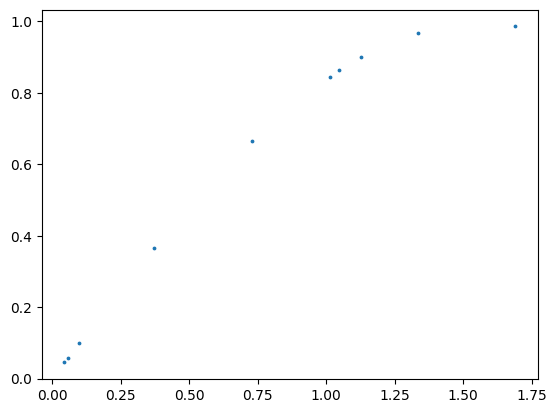

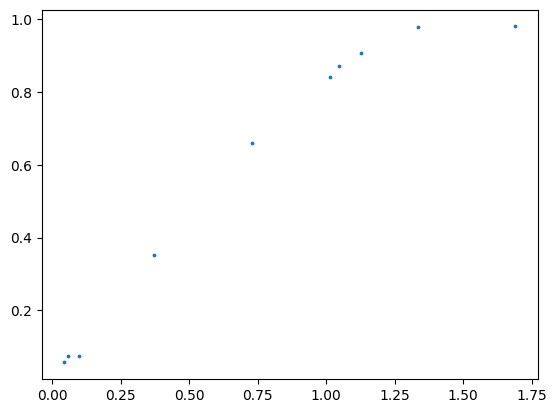

In [40]:
plt.scatter(test[:,0], f(test[:,0], theta_lsq), s = 3)
plt.show()
plt.scatter(test[:, 0], test[:, 1], s = 3)
plt.show()

Text(0.5, 0, 'Число параметров')

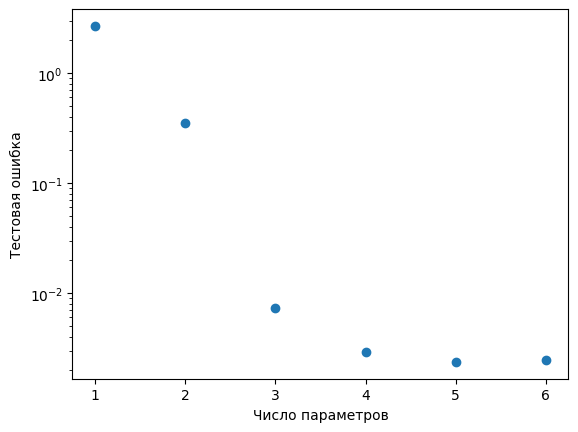

In [41]:
plt.scatter(np.arange(1, D_opt + 1), err_D)
plt.semilogy()
plt.ylabel('Тестовая ошибка')
plt.xlabel('Число параметров')

In the examples above we used explicit results of differentiation but in practice gradient calculation performed by computer. For example, [``autograd``](https://github.com/HIPS/autograd) package is a tool to automatically differentiate native Python and Numpy code.

**Example 5** Create data array, define function and calculate its gradient using autograd

In [42]:
import autograd as ag
# function that perform scalar product of vectors 'x' with 'n' multiplied by 't'
def f(x,t):
    n = np.arange(x.shape[0]) # create 'n' vector as array of numbers from 0 to length of 'x'
    return np.sum(x*n)*t

x = np.random.randn(10) # take input data as array of 10 random values
t = 15 # parameter
print('f(x,t) =',f(x,t) )
# ag.grad(f,y) - provides a partial derivative of 'f' function with respect 'y' variable  
df = ag.grad(f,0) #define gradient
print('df/dx = ',df(x,t))

f(x,t) = -292.3640315820602
df/dx =  [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135.]


**Note**: autograd works with non integer arrays because you can not differentiate integer data.

There are some assumptions in previous consideration.

Firstly, in **least squares method** we assumed that we have a linear dependence from parameters but in the case of non-linear dependence we also need to use non-linear approximation.

**Problem 3.** Using [``autograd``](https://github.com/HIPS/autograd) package, try another non-linear approximation of $y(x)$, 
e.g. by [rational function](https://en.wikipedia.org/wiki/Rational_function) (see also [Padé approximant](https://en.wikipedia.org/wiki/Pad%C3%A9_approximant)). 

Паде-функция

In [43]:
from sklearn.model_selection import train_test_split

iter = 100_000

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def pade_func(x, params):
    a, b, c, d, e = params
    return (a * x**2 + b * x + c) / (d * x + e)

# Define the loss function to minimize
def loss(params, x, y):
    y_pred = pade_func(x, params)
    return np.mean((y - y_pred)**2)

params_init = np.array([1., 1., 1., 1., 1.])

grad_loss = ag.grad(loss, argnum=0)

train_loss, test_loss = np.zeros((iter,), dtype=np.float64), np.zeros((iter,), dtype=np.float64)

learning_rate = 0.1
params = params_init.copy()

optimal_params = params_init.copy()
optimal_iter = -1
min_loss = float("inf")

for i in range(iter):
    gradient = grad_loss(params, X_train, y_train)
    params -= learning_rate * gradient
    train_loss[i], test_loss[i] = loss(params, X_train, y_train), loss(params, X_test, y_test)
    if test_loss[i] < min_loss:
        optimal_params = params
        min_loss = test_loss[i]
        optimal_iter = i + 1

print("Optimal parameters:", optimal_params)
print("Optimal iteration:", optimal_iter)

Optimal parameters: [-0.58052931  1.61980571 -0.01330659 -0.21843463  1.44600783]
Optimal iteration: 78938


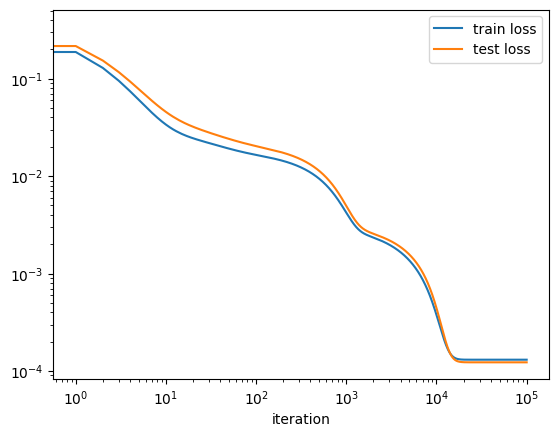

In [44]:
plt.plot(train_loss, label="train loss")
plt.plot(test_loss, label="test loss")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("iteration")
plt.legend()

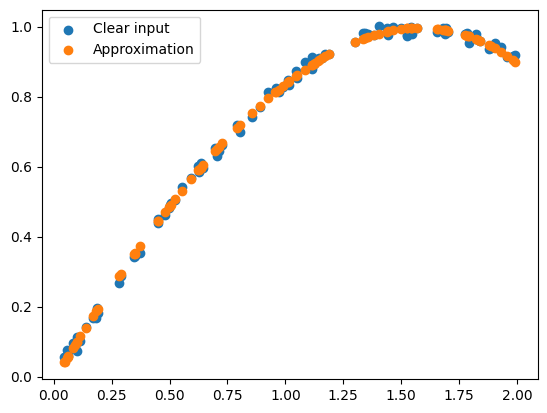

In [45]:
plt.scatter(X, Y, label='Clear input')
plt.scatter(X, pade_func(X, optimal_params), label='Approximation')
plt.legend()
plt.show()

Secondly, we assumed that noise is a random value with normal probability distribution. 
Let p and q are probability distributions of random values 'x' and 'y'. The cross-entropy of this distribution can be defined as
$H(p,q) = -\sum_{x\in X} p(x)\, \log q(x)$

**Problem 4.** Try to use [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy) as a loss function to evaluate distribution of the error term $W=Y-f(X)$. 
Compare the result with the least squares method. 
Train the method using noise with any not normal probability distribution.

For example:

a) [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for noise $W$: $f_W (x) = \dfrac{\Gamma\left(\dfrac{\nu+1}{2}\right)} {\sqrt{\nu\pi}\,\Gamma\left(\dfrac{\nu}{2}\right)} \left(1+\dfrac{x^2}\nu \right)^{-(\nu+1)/2}$

b) Uniform distribution for noise $ f_W = \dfrac{1}{b-a}$ for $a<x<b$

In [46]:
def cross_entropy(theta, x, y):
    w = y - f(x, theta)
    # rn = np.exp(-1*(w/sigma)**2 / 2) * np.abs(w * np.tanh(w))
    rn = np.abs(w * np.tanh(w))
    return np.sum(rn) / len(rn)

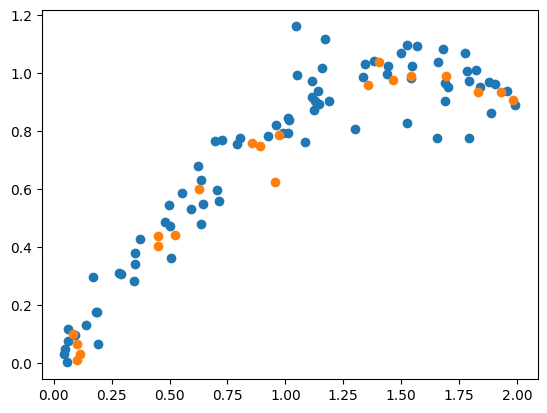

In [47]:
y_train, y_test = np.sin(X_train) + np.random.laplace(size=X_train.shape[0])*0.05, np.sin(X_test) + np.random.laplace(size=X_test.shape[0])*0.05
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [48]:
params_mae, params_mse = np.array([1., 1., 1., 1., 1.]), np.array([1., 1., 1., 1., 1.])

grad_mae = ag.grad(mae)
grad_mse = ag.grad(mse)

iter = 1000
learning_rate = 0.01

train_loss_mae, test_loss_mae = np.zeros((iter,)), np.zeros((iter,))
train_loss_mse, test_loss_mse = np.zeros((iter,)), np.zeros((iter,))


for i in range(iter):
    gradient_mse = grad_mse(params_mse, X_train, y_train)
    params_mse -= learning_rate * gradient_mse

    train_loss_mse[i] = mse(params_mse, X_train, y_train)
    test_loss_mse[i] = mse(params_mse, X_test, y_test)

learning_rate = 0.01
for i in range(iter):
    gradient_mae = grad_mae(params_mae, X_train, y_train)
    params_mae -= learning_rate * gradient_mae

    train_loss_mae[i] = mae(params_mae, X_train, y_train)
    test_loss_mae[i] = mae(params_mae, X_test, y_test)

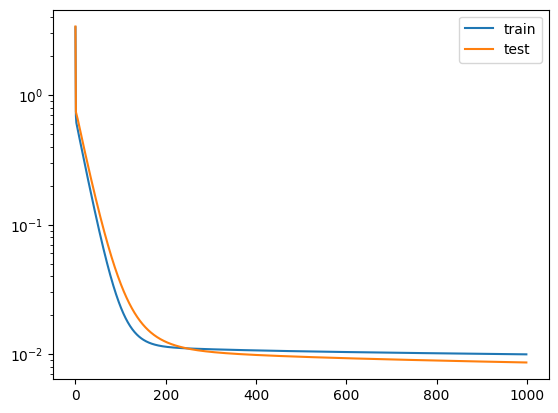

In [49]:
plt.plot(train_loss_mse, label='train')
plt.plot(test_loss_mse, label='test')
plt.legend()
plt.yscale("log")

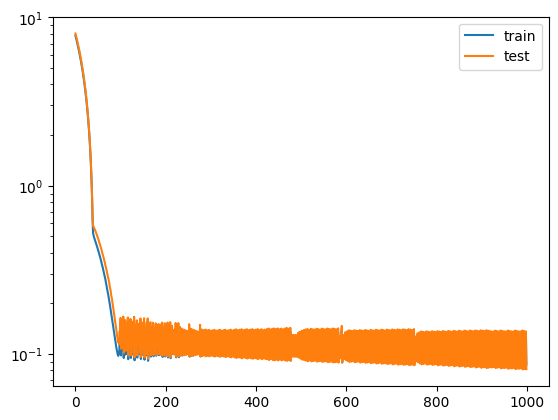

In [50]:
plt.plot(train_loss_mae, label='train')
plt.plot(test_loss_mae, label='test')
plt.legend()
plt.yscale("log")

**Quick recap**
1) Define model
2) Separate data on training and testing parts
3) Calculate gradient (for example, using autograd)
4) Optimize 
5) Check overfitting (for example cross-validation)

**Example 6** Find optimal value of parameter $\theta$ where minimum of Loss function $R(x,y,\theta)$ is achieved using autograd.

Here we will use loss function from **Example 3** defined as a mean square error.
We start from definition of a gradient and then introduce optimization function

In [51]:
dR = ag.grad(fun=R, argnum=0)
# print( R(theta_optimal, X, Y) )
print( dR(theta_optimal, X, Y) )
print( dR(theta_lsq, X, Y) )

ValueError: operands could not be broadcast together with shapes (100,) (6,) 

In [ ]:
theta0 = theta_optimal

def optimize(x,y, theta, alpha, tol=1e-6, maxiter=10000):
  for it in range(maxiter):
    loss = R(theta=theta, x=x, y=y)
    dloss = dR(theta, x, y)
    norm_dloss = np.linalg.norm(dloss.flatten())
    if it%100 == 0:
      print(f"{it}: {loss} {norm_dloss}")
    if norm_dloss<tol: return theta
    theta = theta - alpha*dloss
  return theta

In [ ]:
theta0 = optimize(x=X, y=Y, theta=theta0, alpha=5e-5)
print(theta0)